
# A budget Contraint

*Note:* the plots and simulations rendered below were made with scientific python. To run this notebook interactively on a jupyter server first run the code cells below the [code section](#codesection) at the end of the notebook and the return to run the notebook from the start. You can also view this notebook in slideshow mode (Alt-R).

In [1]:
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
%matplotlib inline

In [2]:
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = [7,7]
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["font.size"] = 18

In [3]:
# Some default parameters when none are supplied
I = 100     # income
PX = 1
PY = 1

In [12]:
NAMEX = 'Good X'
NAMEY = 'Good Y'

XMAX = (I/PX)*4   # for plot bounds and aesthetics
YMAX = (I/PY)*4
N = 50              # num of datapoints to plot
CX =  np.linspace(0.1, XMAX, N)
QX = CX

This function will allow plotting a production possibility frontier (PPF) for any set of $MPL_X$, $MPL_Y$ and $\bar L$.

In [13]:
def budgetp(px, py, I, show = True):   
    '''Plot a linear budget line 
       show == False delays plt.show() to allow other elements to be plotted first'''
    cy = I/py - (px/py) * CX
    plt.plot(CX, cy, linewidth=2, label='PPF')
    plt.axis([0,XMAX,0,YMAX])
    plt.xlabel(NAMEX), plt.ylabel(NAMEY) 
    plt.text(0.7*XMAX, 0.90*YMAX, 
         r'I = '+'{:3.0f}'.format(I),fontsize=20)
    plt.text(0.7*XMAX, 0.8*YMAX, 
             r'$\frac{P_X}{P_Y}=$'+'{:3.2f}'.format(px/py),fontsize=20)
    if show: #use False for subplots
        plt.show();

In [14]:
interact(budgetp,px=(0.5,4,0.25),py=(0.25,4,0.25), I=(50,200,50), show=fixed(True))

interactive(children=(FloatSlider(value=2.25, description='px', max=4.0, min=0.5, step=0.25), FloatSlider(valu…

<function __main__.budgetp(px, py, I, show=True)>

In [15]:
def ppf(mplx, mply, lbar, show = True, title='Home'):   
    '''Plot a linear PPF diagram 
       show == False delays plt.show() to allow other elements to be plotted first'''
    qy = mply*lbar - (mply/mplx) * QX
    plt.plot(QX, qy, linewidth=2, label='PPF')
    plt.axis([0,XMAX,0,YMAX])
    plt.xlabel(NAMEX), plt.ylabel(NAMEY), plt.title(title)
    plt.text(0.15*XMAX, 0.9*YMAX, 
             r'   $\frac{MPL_Y}{MPL_X}=\frac{P_X}{P_Y}=$'+'{:3.2f}'.format(mply/mplx)
             + ' units of Y per X', fontsize=18    )  
    if show: #use False for subplots
        plt.show();

In [16]:
def openppf(mplx, mply, lbar, pw, show=True, title='Home'):
    ppf(mplx, mply, lbar, show=False, title=title)
    if pw < (mply/mplx):
        plt.plot(QX, mply*lbar - pw * QX, linestyle='--' )
        plt.scatter(0, mply*lbar, s=100, clip_on=False)
    else:
        plt.plot(QX, pw*mplx*lbar - pw * QX, linestyle='--' )
        plt.scatter(mplx*lbar,0, s=100, clip_on=False)

In [17]:
homeopen = openppf

In [18]:
def twopane(mplx, mply, lbar, mplfx, mplfy, lbarf, p):
    foreign = openppf
    f1 = plt.figure(1, figsize =(12,12))
    plt.subplot(121, aspect='equal')
    openppf(mplx, mply, lbar, p, show = False)
    plt.subplot(122, aspect='equal')
    foreign(mplfx, mplfy, lbarf, p, show=False, title='Foreign')
    plt.ylabel('');

## Production Technologies

The economy produces two goods $X$ and $Y$. Labor is the only input.

Good $X$ and good $Y$ are produced with linear production technologies:

$$Q_X = MPL_X \cdot L_X$$

$$Q_Y = MPL_Y \cdot L_Y$$

where $MPL_X$ and $MPL_X$ are the constant **marginal products of labor** in the $X$ and the $Y$ sector, respectively. 

The marginal product of good $X$ is measured in *units of good $X$ per unit labor*.

## The Labor resource constraint

The sum of labor demands in the two sectors cannot exceed the economy's total labor supply $\bar L$:

$$L_X + L_Y = \bar L$$

### Minimum labor requirements

We can invert the $X$ production function to get the minimum labor required to produce quantity $Q_X$:
    
$$L_X = \frac{1}{MPL_X} Q_X$$

$a_{LX}=\frac{1}{MPL_X}$ is the constant **unit labor requirement** to produce each additional unit of $Q_X$.

Similarly, the minimum labor required to produce $Q_Y$ is 

$$L_Y = \frac{1}{MPL_Y} Q_Y$$

$a_{LY}=\frac{1}{MPL_Y}$ is the constant **unit labor requirement** to produce each additional unit of $Q_Y$.

### Production Possibility Frontier

The economy's labor resource constraint

$$L_X + L_Y = \bar L$$

can be rewritten 

$$\frac{1}{MPL_X} Q_X + \frac{1}{MPL_Y} Q_Y = \bar L$$

Together the technology and resource constraints create a tradeoff between $Q_X$ and $Q_Y$. 

With labor fully employed, $Q_X$ can only be expanded by reducing output of $Q_Y$ to release the required labor.

To plot, re-arrange the PPF constraint as:

$$Q_Y = MPL_Y \cdot \bar L - \frac{MPL_Y}{MPL_X} Q_X$$

**Example:**  $MPL_X = 2$, $MPL_Y = 1$ and $\bar L = 200$. 

$$Q_Y = 200 - \frac{1}{2} Q_X$$

The PPF has: 

  - $Y$ intercept:   $MPL_Y \cdot \bar L = 1 \cdot 200 = 200$


  - $X$ intercept:   $MPL_X \cdot \bar L = 2 \cdot 200 = 400$ 


  - The (negative of the) slope tells us that **the opportunity cost of producing one more unit 
  of $X$** is 
  $$\frac{MPL_Y}{MPL_X}= \frac{1}{2} \text { units of } Y$$
  

### The production possibility frontier
Connect the $Q_Y$ intercept $MPL_Y \bar L$ to the $Q_X$ intercept $MPL_X \bar L$,  

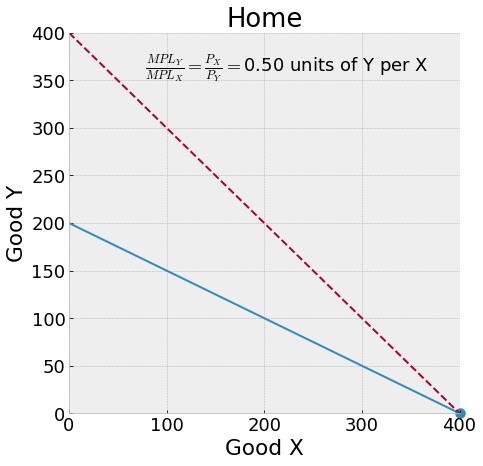

In [19]:
openppf(mplx=2,mply=1,lbar=200, pw=1)

### Opportunity cost of X explained

To produce one more unit of $X$ requires $a_{LX}=\frac{1}{MPL_X}$

removing that much labor from $Y$ production will reduce $Y$ output by 

$$MPL_Y \cdot \frac{1}{MPL_X} = \frac{1}{2} \text{ units of good Y per good X}$$

## Competive Market Equilibrium
Thus far we've described the tradeoffs imposed by technological and resource constraints. The economy could be centrally planned or a competitive market economy.  

Prices and wages in a competitive economy are determined as follows.

### Competitive Prices and Wages

Profit maximizing firms hire labor until  the marginal value product of labor equals the market wage and labor mobility allows workers to move to whichever firm pays the highest wage.  In equilibrium we must have:

$$P_X \cdot MPL_X = w = P_Y \cdot MPL_Y   $$

All workers are paid the same wage equal to their marginal value product, which is equalized across firms and sectors. 

###  Real wages

The nominal wage $w$ is measured in dollars. 

Two useful **real wage** measures: 

$$\frac{w}{P_X} = MPL_X \, \,\,\, \text{(units of good X per unit of labor)}$$

$$\frac{w}{P_Y} = MPL_Y\, \,\,\, \text{(units of good Y per unit of labor)}$$

these measure the *purchasing power* of this nominal wage in terms of good $X$ and good $Y$ respectively. 

$$\frac{w}{P_X}=MPL_X=2  \text{ and } \frac{w}{P_Y}=MPL_Y=1$$


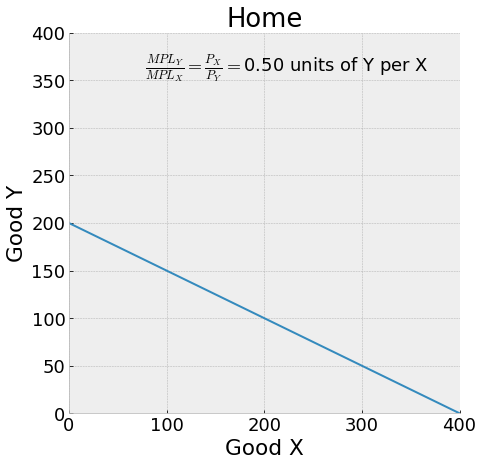

In [20]:
ppf(2,1,200)

**Important Note**: 

$\frac{w}{P_X}$ and $\frac{w}{P_Y}$ are **not** different wages in each sector. They are just two different ways to measure the real purchasing power of a workers' wage. 

*There is only one wage in the economy* and all workers earn the same wage no matter what sector or firm they work in.

We could also define a real wage in terms of any arbitrary basket of goods. For example, let  

$$P_B = P_X + P_Y$$

be the price of a basket with one unit of good $X$ and one of good $Y$.  The wage $w$ can purchase $\frac{w}{P_B}$ such baskets.

### Marginal cost prices

To produce one unit of $X$ requires $a_{LX}=\frac{1}{MPL_X}$ units of labor. Each unit of labor costs $w$. Hence the marginal cost of producing $X$ is

$$MC_X = \frac{w}{MPL_X}$$

Since competitive firms maximize profits when $P_X=MC_x$ :

$$P_X = \frac{w}{MPL_X}$$

Similarly in sector $Y$, firms price at: 

$$P_Y = \frac{w}{MPL_Y}$$

## The domestic relative price ratio

$$P_X =\frac{w}{MPL_X}$$

$$P_Y = \frac{w}{MPL_Y}$$

So the **domestic (or closed economy) relative price of $X$ measured in terms of good $Y$** is 

$$\frac{P_X}{P_Y} = \frac{MPL_Y}{MPL_X}$$

which is equal to the slope of the PPF.

### Supply side determination of prices

A special feature of this Classical Ricardian model with linear production technologies is that we can determine equilibrium prices in the economy without having to specify consumer preferences or demand. This will not be the case in more general models.

### Interactive diagram 
Visible/interactive if running a jupyter server.

In [21]:
interact(ppf, mplx=(0.5,2,0.1), mply=(0.5,2,0.1), lbar=(50, 200, 10),show=fixed(True), title=fixed('Home'));

interactive(children=(FloatSlider(value=1.2000000000000002, description='mplx', max=2.0, min=0.5), FloatSlider…

## Gains to Opening to Trade

### A two country model
Technologies and hence domestic relative prices are different in two countries:

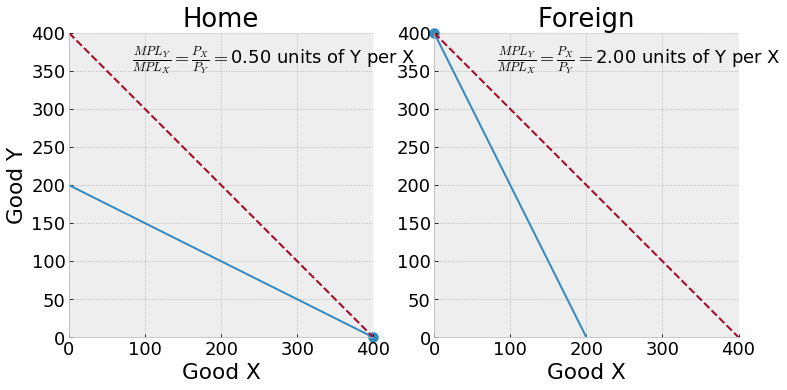

In [22]:
twopane(4, 2, 100, 2, 4, 100, p=1)

In [23]:
interact(twopane, mplx=fixed(4), mply=fixed(2), lbar=fixed(100),  mplfx=(0.5,2,0.1), mplfy=(0.5,2,0.1), lbarf=(50, 200, 10),p=(0.2,3,0.1));

interactive(children=(FloatSlider(value=1.2000000000000002, description='mplfx', max=2.0, min=0.5), FloatSlide…

## Home opens to Trade

Suppose $MPL_X=2$ and $MPL_Y=1$. Home's domestic relative price is:

$$\frac{MPL_Y}{MPL_X}= \frac{1}{2}$$

Tells us the **opportunity cost of producing one unit of good X** measured in terms of good Y at Home.

Home is a small open economy. 

Home's domestic relative price:

$$\frac{P_X}{P_Y}=\frac{MPL_Y}{MPL_X}= \frac{1}{2}$$

The world relative price 

$$\frac{P^w_X}{P^w_Y} = 1$$

**Home is a low opportunity cost producer of good $X$.**

i.e. Home has a **comparative advantage in the production of good X**

In [24]:
def indif(x, ubar):
    return ubar/x 

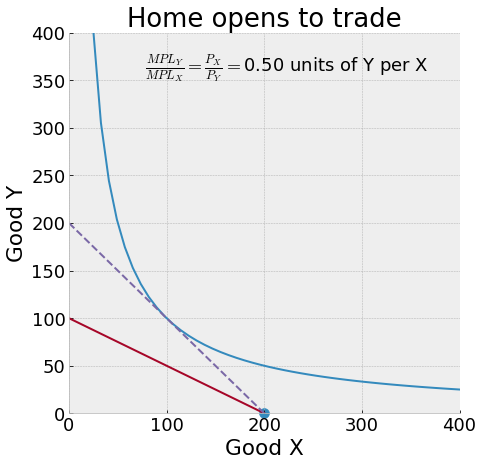

In [25]:
plt.plot(QX, indif(QX, 10000))
homeopen(pw=1, mplx=2,mply=1,lbar=100, title='Home opens to trade')

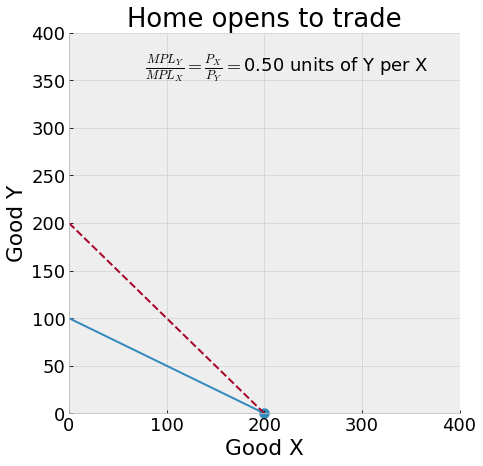

In [26]:
homeopen(pw=1, mplx=2,mply=1,lbar=100, title='Home opens to trade')
plt.show()

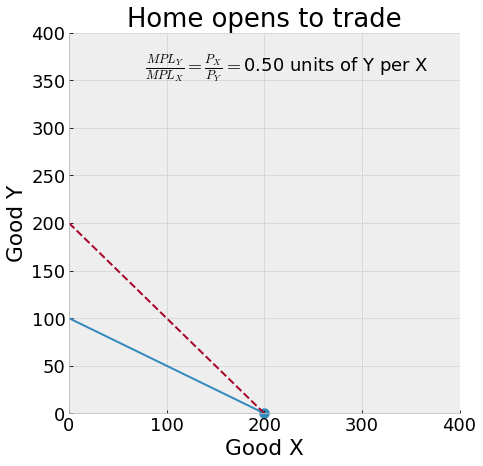

In [27]:
homeopen(pw=1, mplx=2,mply=1,lbar=100, title='Home opens to trade')
plt.show()

### Foreign opens to trade

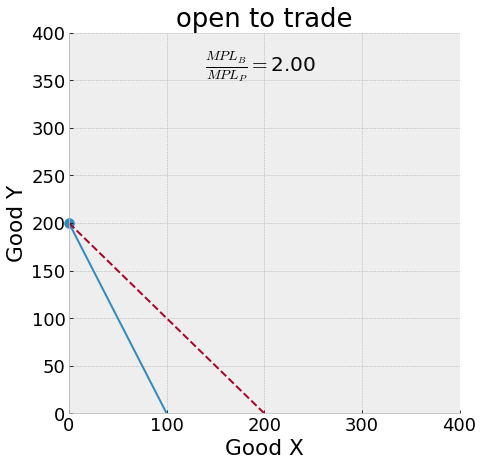

In [18]:
homeopen(pw=1, mplx=1,mply=2,lbar=100, title='open to trade')
plt.show()

<a id='codesection'></a>
## Code Section

Run the cells below first to import needed libraries and functions.

#### notebook preliminaries
The next several cells import several python libraries, set some parameters, and define a few useful functions that we'll use below.

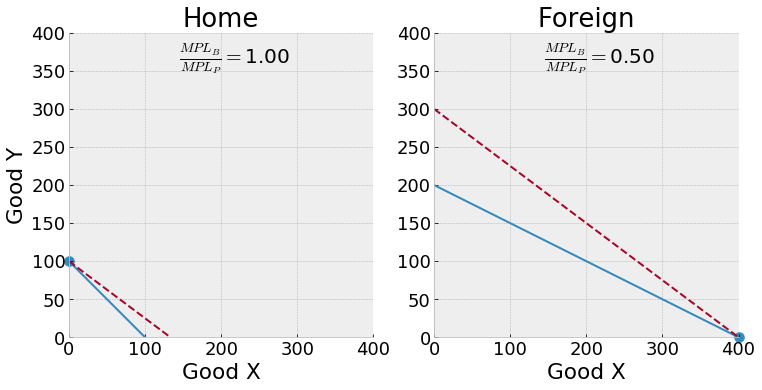

In [19]:
twopane(MPLX, MPLY, LBAR, 4*MPLX, 2*MPLY, LBAR, p=3/4)